<a href="https://colab.research.google.com/github/ashutosh-linux/aashu/blob/main/PROTO_TYPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install pycocotools
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torchmetrics.detection.mean_ap import MeanAveragePrecision


In [26]:
# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the classification head to detect 2 classes: (Background + Unauthorized Construction)
num_classes = 2  # Background + Construction Classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Set model to evaluation mode
model.eval()

print("✅ Faster R-CNN model loaded and modified successfully!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Faster R-CNN model loaded and modified successfully!


In [4]:
# Define dataset paths
train_dataset_path = "/content/drive/MyDrive/sr_university_dataset/sr_university_dataset/train"
val_dataset_path = "/content/drive/MyDrive/sr_university_dataset/sr_university_dataset/val"

# Output directory for detected images
output_path = "/content/drive/MyDrive/sr_university_dataset/output 1"
os.makedirs(output_path, exist_ok=True)

# Define image transformation
transform = transforms.Compose([transforms.ToTensor()])

# Train Faster R-CNN
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    print(f"🛠️ Training Epoch {epoch+1}/{num_epochs}")

    for filename in os.listdir(train_dataset_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(train_dataset_path, filename)

            # Load and preprocess image
            image = Image.open(image_path).convert("RGB")
            image_tensor = transform(image).unsqueeze(0)

            # Enable gradient tracking for the input tensor
            image_tensor.requires_grad = True

            # Forward pass
            optimizer.zero_grad()
            predictions = model(image_tensor)

            # Backpropagation (Dummy loss for now, replace with actual loss if you have annotations)
            # Ensure loss has a gradient function
            loss = sum(loss for loss in predictions.values()) if isinstance(predictions, dict) else torch.tensor(0.0, requires_grad=True)
            loss.backward()
            optimizer.step()

    print(f"✅ Epoch {epoch+1} completed!")

print("🎯 Training completed successfully!")

🛠️ Training Epoch 1/10
✅ Epoch 1 completed!
🛠️ Training Epoch 2/10
✅ Epoch 2 completed!
🛠️ Training Epoch 3/10
✅ Epoch 3 completed!
🛠️ Training Epoch 4/10
✅ Epoch 4 completed!
🛠️ Training Epoch 5/10
✅ Epoch 5 completed!
🛠️ Training Epoch 6/10
✅ Epoch 6 completed!
🛠️ Training Epoch 7/10
✅ Epoch 7 completed!
🛠️ Training Epoch 8/10
✅ Epoch 8 completed!
🛠️ Training Epoch 9/10
✅ Epoch 9 completed!
🛠️ Training Epoch 10/10
✅ Epoch 10 completed!
🎯 Training completed successfully!


In [5]:
# Save the trained model in TorchScript format
model.eval()
torch.jit.save(torch.jit.script(model), "/content/drive/MyDrive/sr_university_dataset/model_fasterrcnn.torchscript")
print("✅ Model saved successfully in TorchScript format!")


✅ Model saved successfully in TorchScript format!


In [30]:
import torch
import torchvision

# Load the saved TorchScript model
scripted_model_path = "/content/drive/MyDrive/sr_university_dataset/model_fasterrcnn.torchscript"
loaded_model = torch.jit.load(scripted_model_path)

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


code/__torch__/torchvision/models/detection/faster_rcnn.py:103: UserWarning: RCNN always returns a (Losses, Detections) tuple in scripting


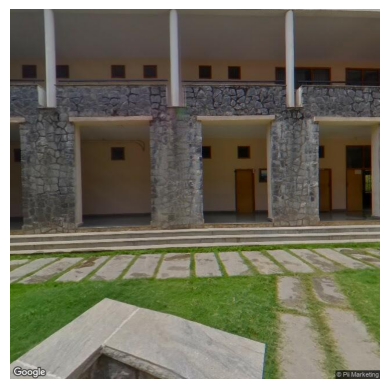

({}, [{'boxes': tensor([[6.2598e+02, 1.3987e+02, 6.3978e+02, 1.5353e+02],
        [1.6444e+00, 1.8086e+02, 2.3456e+01, 1.9281e+02],
        [3.0514e+02, 1.7775e+02, 4.6397e+02, 1.9578e+02],
        [2.3475e+00, 1.7127e+02, 2.1676e+01, 2.0140e+02],
        [0.0000e+00, 1.6485e+02, 2.9117e+01, 1.9613e+02],
        [2.9246e+02, 1.7960e+02, 4.8514e+02, 2.1752e+02],
        [3.4345e-02, 0.0000e+00, 2.4451e+00, 4.9928e+00],
        [7.0279e+01, 1.7028e+02, 2.8129e+02, 2.1478e+02],
        [6.1366e+02, 3.0381e+02, 6.2732e+02, 3.4166e+02],
        [6.1468e+02, 0.0000e+00, 6.4000e+02, 1.1992e+01],
        [6.9969e-02, 0.0000e+00, 4.7036e+00, 5.2066e+00],
        [6.3039e+02, 1.4570e+02, 6.3987e+02, 1.7909e+02],
        [4.4353e+02, 3.4081e+02, 5.3193e+02, 3.7200e+02],
        [2.2981e+02, 2.4138e+02, 3.5697e+02, 2.6834e+02],
        [4.5278e+02, 8.4091e+01, 6.3853e+02, 1.2428e+02],
        [2.3405e+02, 2.0655e+02, 3.4826e+02, 2.3744e+02],
        [4.3795e-02, 6.2947e+02, 2.8749e+00, 6.3927e+02]

In [32]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load the trained model
loaded_model = torch.jit.load("/content/drive/MyDrive/sr_university_dataset/model_fasterrcnn.torchscript")
loaded_model.eval()  # Set to evaluation mode

# Load test image
test_image_path = "/content/drive/MyDrive/sr_university_dataset/sr_university_dataset/val/sr_university_18.0895_79.46849999999999_120.jpg"
image = Image.open(test_image_path).convert("RGB")

# Preprocess image (resize, normalize, convert to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),
])

image_tensor = transform(image)  # Convert to tensor
#image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    # Run inference
with torch.no_grad():
        results = loaded_model([image_tensor])  # Pass as a list

        # Display image
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        # Print results
        print(results)


In [17]:
# Load trained Faster R-CNN model
loaded_model = torch.jit.load("/content/drive/MyDrive/sr_university_dataset/model_fasterrcnn.torchscript")
loaded_model.eval()

# Define evaluation metric
metric = MeanAveragePrecision()

# Loop through validation images and evaluate performance
for filename in os.listdir(val_dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        image_path = os.path.join(val_dataset_path, filename)

        # Load and preprocess image
        image = Image.open(image_path).convert("RGB")
        image_tensor = transform(image)  # ✅ No unsqueeze()

        # Run inference (FIX: Wrap image tensor in a list)
        with torch.no_grad():
            prediction = loaded_model([image_tensor])  # ✅ FIXED

        # Extract boxes, scores, and labels properly
        # prediction is a tuple (loss, detections)
        # detections is a list of dictionaries, one for each image in the batch
        # Since we have only one image in the batch, we take the first element of the list
        detections = prediction[0] # Access the detections from the tuple

        # Check if detections contains any objects
        if detections:
            boxes = detections["boxes"]
            scores = detections["scores"]
            labels = detections["labels"].to(torch.int64)  # ✅ Convert labels to int

            # Convert prediction format for evaluation
            preds = [{"boxes": boxes, "scores": scores, "labels": labels}]
            targets = [{"boxes": torch.zeros(1, 4), "labels": torch.zeros(1, dtype=torch.int64)}]  # Dummy ground truth

            # Update metric
            metric.update(preds, targets)
        else:
            print(f"No detections found for image: {filename}")


# Compute mAP
map_metrics = metric.compute()
print("📊 Model Evaluation Metrics:")
print(map_metrics)

code/__torch__/torchvision/models/detection/faster_rcnn.py:103: UserWarning: RCNN always returns a (Losses, Detections) tuple in scripting


No detections found for image: sr_university_18.09_79.46799999999999_240.jpg
No detections found for image: sr_university_18.0895_79.46799999999999_180.jpg
No detections found for image: sr_university_18.09_79.469_60.jpg
No detections found for image: sr_university_18.0895_79.46849999999999_120.jpg
No detections found for image: sr_university_18.0895_79.46799999999999_120.jpg
No detections found for image: sr_university_18.0895_79.46799999999999_0.jpg
No detections found for image: sr_university_18.09_79.469_300.jpg
No detections found for image: sr_university_18.089000000000002_79.469_180.jpg
No detections found for image: sr_university_18.089000000000002_79.46849999999999_60.jpg
No detections found for image: sr_university_18.0895_79.46749999999999_300.jpg
No detections found for image: sr_university_18.0885_79.469_300.jpg
No detections found for image: sr_university_18.09_79.46849999999999_240.jpg
No detections found for image: sr_university_18.089000000000002_79.467_300.jpg
No dete

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MeanAveragePrecision was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


In [24]:
import os
import torch
import cv2
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
loaded_model = torch.jit.load("/content/drive/MyDrive/sr_university_dataset/model_fasterrcnn.torchscript")
loaded_model.eval()

# Define validation image folder
val_folder = "/content/drive/MyDrive/sr_university_dataset/sr_university_dataset/val"
output_folder = "/content/drive/MyDrive/sr_university_dataset/output"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Image preprocessing transformation
transform = transforms.Compose([transforms.ToTensor()])

# Process all images in the folder
for filename in os.listdir(val_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(val_folder, filename)

        # Load and preprocess image
        image = Image.open(image_path).convert("RGB")
        image_tensor = transform(image)  # Convert to tensor

        # Run inference
        with torch.no_grad():
            predictions = loaded_model([image_tensor])  # Wrap tensor in list

        # Convert image to OpenCV format
        image_cv = cv2.imread(image_path)

        # Check if predictions[0] contains any detections
        if predictions[0]:  # Check if the dictionary is not empty
            # Draw bounding boxes
            has_detections = False
            for idx, score in enumerate(predictions[0]['scores']):
                if score > 0.3:  # Lower confidence threshold to capture more detections
                    has_detections = True
                    box = predictions[0]['boxes'][idx].numpy()
                    x1, y1, x2, y2 = map(int, box)
                    cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(image_cv, f"Unauthorized ({score:.2f})", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Save detected image only if there were detections
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, image_cv)

            if has_detections:
                print(f"✅ Detections found in {filename}, saved at: {output_path}")
            else:
                print(f"⚠️ No detections found in {filename}.")
        else:
            print(f"⚠️ No detections found in {filename}. Skipping bounding box drawing.") # Handle case where no detections are found

print("🎯 Batch Detection Completed! Check the output folder.")

code/__torch__/torchvision/models/detection/faster_rcnn.py:103: UserWarning: RCNN always returns a (Losses, Detections) tuple in scripting


⚠️ No detections found in sr_university_18.09_79.46799999999999_240.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.0895_79.46799999999999_180.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.09_79.469_60.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.0895_79.46849999999999_120.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.0895_79.46799999999999_120.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.0895_79.46799999999999_0.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.09_79.469_300.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.089000000000002_79.469_180.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.089000000000002_79.46849999999999_60.jpg. Skipping bounding box drawing.
⚠️ No detections found in sr_university_18.0895_79.46749999999999_3